In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import numpy as np
import os
import time

In [3]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

In [4]:
text = open(path_to_file,'rb').read().decode(encoding='utf-8')
print(len(text))

1115394


In [5]:
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [6]:
# get unique words
vocab = sorted(set(text))
print(len(vocab))

65


In [7]:
# convert char to index

char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text])

In [8]:
for char, i in zip(char2idx, range(20)):
    print(' {:10s}: {:3d},'.format(repr(char), char2idx[char]))

 '\n'      :   0,
 ' '       :   1,
 '!'       :   2,
 '$'       :   3,
 '&'       :   4,
 "'"       :   5,
 ','       :   6,
 '-'       :   7,
 '.'       :   8,
 '3'       :   9,
 ':'       :  10,
 ';'       :  11,
 '?'       :  12,
 'A'       :  13,
 'B'       :  14,
 'C'       :  15,
 'D'       :  16,
 'E'       :  17,
 'F'       :  18,
 'G'       :  19,


In [9]:
# creating training examples and target

seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

In [10]:
# for i in char_dataset.take(5):
#     print(idx2char[i.numpy()])

In [11]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

In [12]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text,target_text

#maps sequences to teh function split_input_target
dataset = sequences.map(split_input_target)

In [13]:
BATCH_SIZE = 64

BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

print(dataset)

# shuffled the dataset

<DatasetV1Adapter shapes: ((64, 100), (64, 100)), types: (tf.int32, tf.int32)>


In [14]:
vocab_size = len(vocab)

embedding_dim = 256

rnn_units =1024

In [15]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
      #maps thenumbersof each character to a vector with embedding_dim dimensions
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
        #Atype of rnn with size units=rnn units
    tf.keras.layers.GRU(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
      #the output layer with vocab size outputs
    tf.keras.layers.Dense(vocab_size)
  ])
  return model


In [16]:
model = build_model(
    vocab_size = len(vocab),
    embedding_dim = embedding_dim,
    rnn_units = rnn_units,
    batch_size = BATCH_SIZE
)

W0226 07:46:55.772123 18332 deprecation.py:506] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0226 07:46:55.774118 18332 deprecation.py:506] From C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


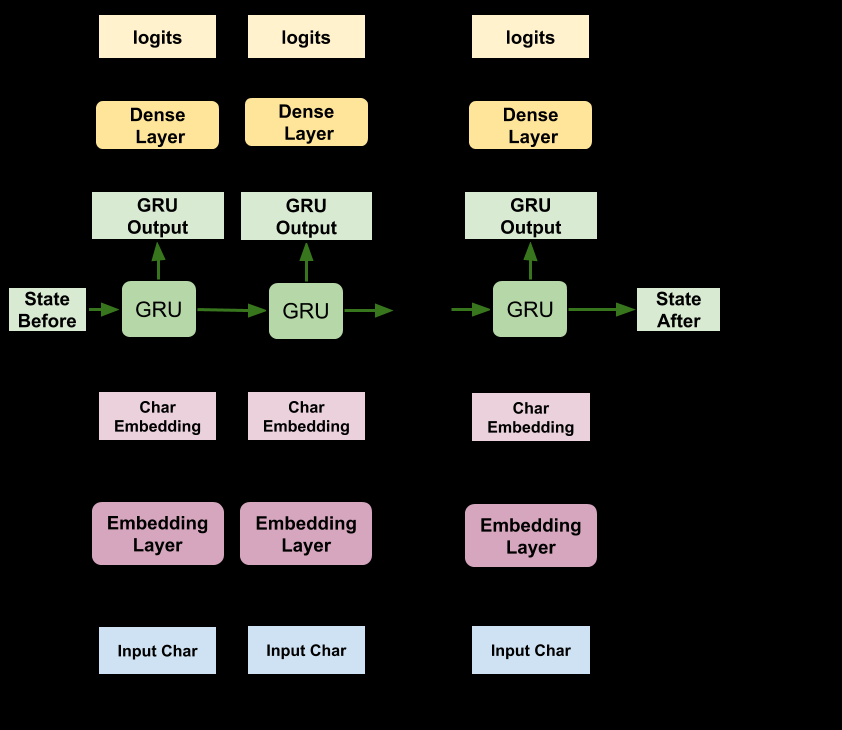

In [ ]:
for input_example_batch, target_example_batch in dataset.take(1):
  example_batch_predictions = model(input_example_batch)
  print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")


(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) # (batch_size, sequence_length, vocab_size)
(64, 100, 65) 

In [ ]:
model.summary()

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
# sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()